# **1. The confusion between normalization and regularization**

Whenever I studied machine learning terms, the word normalization always felt a bit foreign and somehow made me lose interest.

Today, I want to talk about regularization, which I used to confuse with normalization when I first started learning. I really needed to make it clear to myself that these two are completely different concepts.

To put it simply, normalization is about scaling features that have different ranges so that they’re on the same scale.
For example, in one dataset, you might have height, weight, and BMI — all with totally different scales. You bring them to a similar range using scaling techniques.

A common example of this is min-max scaling.

But since my main topic today isn’t normalization, I’ll stop here and move on.



# **2. The formulas can look pretty complicated**

When it comes to ***Lasso (L1)***, it adds a penalty based on the absolute values of the coefficients.

If I write it as a formula, it looks like this:

**Loss = Mean Squared Error + λ × sum of the absolute values of the coefficients.**

Basically, we intentionally increase the loss to help prevent overfitting.


***Ridge (L2)***, on the other hand, uses the sum of the squared coefficients as the penalty.

When I first saw these formulas, I found them really confusing.

The part that used to trip me up the most was figuring out exactly where this regularization term gets applied.

I finally understood that it’s not applied to the regression equation itself but rather to the loss function (which is the difference between the actual and predicted values).

When you use libraries like scikit-learn, all of this is hidden inside one line of code, so it’s hard to see how the regularization is actually working behind the scenes.

That’s why I felt the need to go back and organize these ideas clearly for myself.

In the code, the lambda (or alpha) value is a hyperparameter — we can try different values and tune it however we like.



▶ MSE (Linear Regression): 1185.9725528053289
▶ MSE (Ridge): 1139.7015461265046
▶ MSE (Lasso): 821.4130148013883


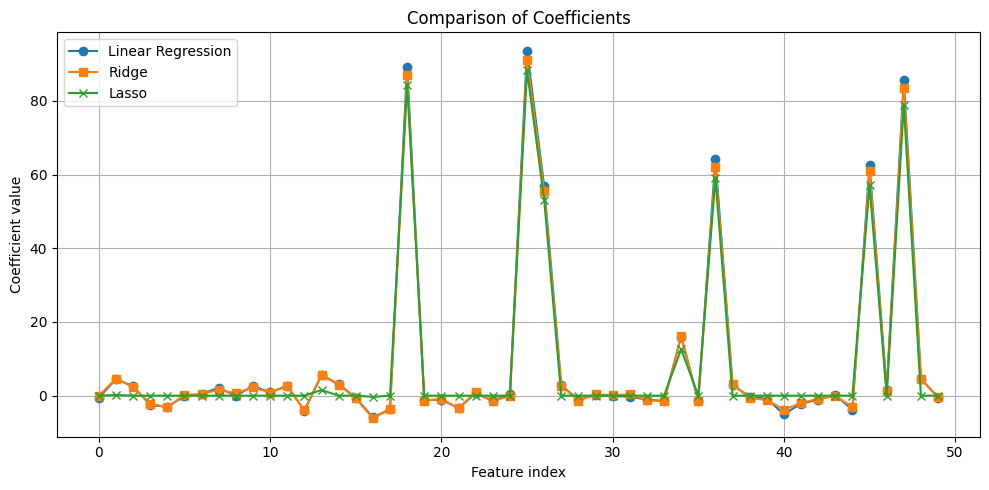

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 1. Dataset Creation
X, y = make_regression(n_samples=300, n_features=50, noise=30, random_state=0)

# 2. Training/Test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 3. Model Setup
lr = LinearRegression()
ridge = Ridge(alpha=5.0)
lasso = Lasso(alpha=5.0)

# 4. Model Training
lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# 5. Prediction
y_pred_lr = lr.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

# 6. MSE Comparison
print("▶ MSE (Linear Regression):", mean_squared_error(y_test, y_pred_lr))
print("▶ MSE (Ridge):", mean_squared_error(y_test, y_pred_ridge))
print("▶ MSE (Lasso):", mean_squared_error(y_test, y_pred_lasso))

# 7. Comparison of Coefficients
plt.figure(figsize=(10, 5))
plt.plot(lr.coef_, 'o-', label='Linear Regression')
plt.plot(ridge.coef_, 's-', label='Ridge')
plt.plot(lasso.coef_, 'x-', label='Lasso')
plt.title("Comparison of Coefficients")
plt.xlabel("Feature index")
plt.ylabel("Coefficient value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



# **3. Comparing them in code (with graphs)**

To make things easier to understand, I used GPT to create a simple regression example.

In that code, I compared the MSE (mean squared error) of a regular linear regression model with models using Ridge and Lasso regularization.

The alpha value here does the same job as lambda in the formulas, and it’s something you can set yourself.

The graph shows the MSE values for Ridge and Lasso, and also helps you see how many features are actually meaningful.

In this example, I purposely set it up so that the linear regression model would overfit — by using a small dataset, adding lots of noise, and including relatively many features.

Looking at the graph, you can see that Lasso drives unimportant feature coefficients all the way down to zero.

When I checked the MSE values, Lasso ended up with 821, which is lower. And as we know, a lower MSE generally means better predictive performance.

Ridge had an MSE of 1,139, which was slightly better than the original linear model.

